In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

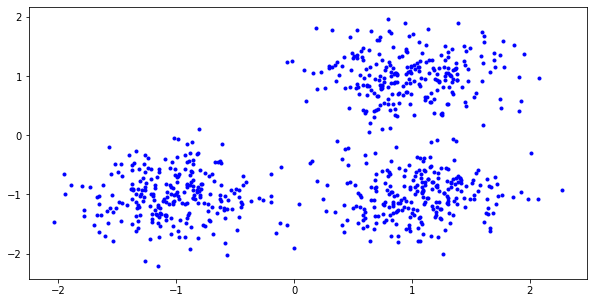

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
plt.figure(figsize=(10,5))
plt.plot(X[:, 0], X[:, 1],'b.')
plt.show()

In [3]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
print(labels[0:20])

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2]


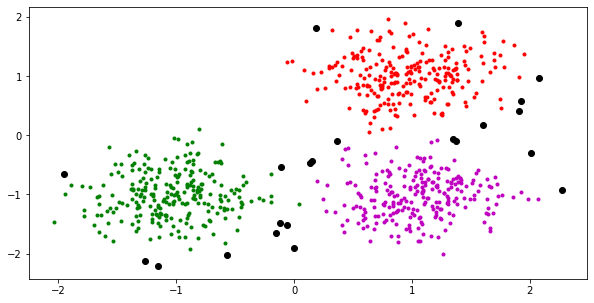

In [4]:
plt.figure(figsize=(10,5))
plt.plot(X[:, 0][labels==0], X[:, 1][labels==0],'r.')
plt.plot(X[:, 0][labels==1], X[:, 1][labels==1],'g.')
plt.plot(X[:, 0][labels==2], X[:, 1][labels==2],'m.')
plt.plot(X[:, 0][labels==-1], X[:, 1][labels==-1],'ko')
plt.show()

## How to choose min_samples and eps

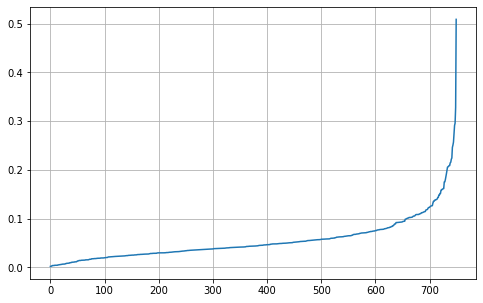

In [5]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.grid()
plt.show()

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2 -1  0 -1  1 -1  2]


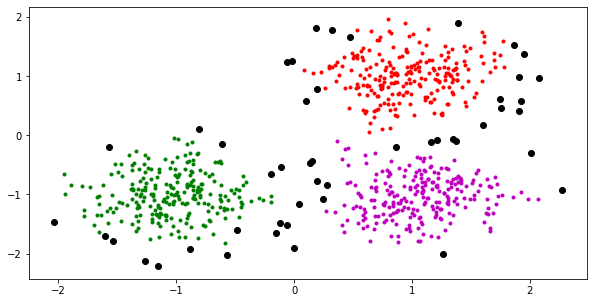

In [21]:
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_
print(labels[0:20])

plt.figure(figsize=(10,5))
plt.plot(X[:, 0][labels==0], X[:, 1][labels==0],'r.')
plt.plot(X[:, 0][labels==1], X[:, 1][labels==1],'g.')
plt.plot(X[:, 0][labels==2], X[:, 1][labels==2],'m.')
plt.plot(X[:, 0][labels==-1], X[:, 1][labels==-1],'ko')
plt.show()

In [22]:
from sklearn.metrics import silhouette_score
print('Silhouette Score is', silhouette_score(X,labels))

Silhouette Score is 0.5932613380153006


# KMeans and DBSCAN

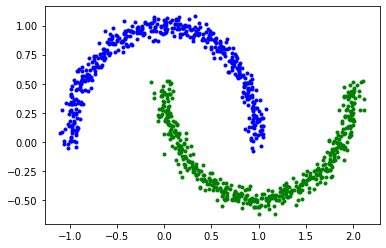

In [23]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.show()

<Figure size 1080x360 with 0 Axes>

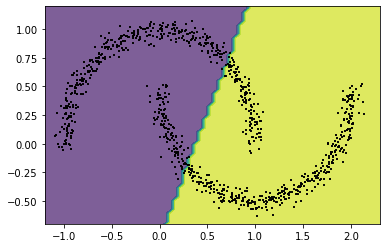

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random', n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(15, 5))
disp = DecisionBoundaryDisplay.from_estimator(kmeans,X,response_method="predict",alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], s=1,marker='s',c='k')
plt.axis([-1.2,2.3,-0.7,1.2])
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
print('Silhouette Score for KMEANS is', silhouette_score(X,y_pred))

Silhouette Score for KMEANS is 0.48872684711947256


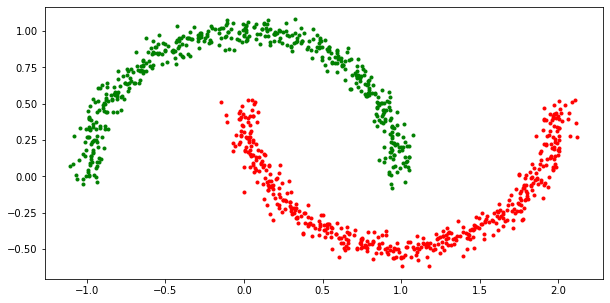

In [30]:
db = DBSCAN(eps=0.15, min_samples=5).fit(X)
labels = db.labels_
np.unique(labels)

plt.figure(figsize=(10,5))
plt.plot(X[:, 0][labels==0], X[:, 1][labels==0],'r.')
plt.plot(X[:, 0][labels==1], X[:, 1][labels==1],'g.')
plt.plot(X[:, 0][labels==-1], X[:, 1][labels==-1],'ko')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
print('Silhouette Score for DBSCAN is', silhouette_score(X,labels))

Silhouette Score for DBSCAN is 0.3344007439413958


## Davies-Bouldin Index

The index is defined as the average similarity between each cluster $C_i$ and its most similar one $C_j$. In the context of this index, similarity is defined as a measure $R_{ij}$ that trades off: <br>

$S_i$, the average distance between each point of cluster and the centroid of that cluster – also know as cluster diameter. <br>
$d_{i,j}$, the distance between cluster centroids i and j. <br>

A simple choice to construct $R_{ij}$ so that it is nonnegative and symmetric is:
$$R_{ij} = \frac{s_i + s_j}{d_{ij}}$$
 
Then the Davies-Bouldin index is defined as:
$$DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} R_{ij}$$ 

In [32]:
from sklearn.metrics import davies_bouldin_score
print('DBSCAN',davies_bouldin_score(X,labels))
print('KMEANS',davies_bouldin_score(X,y_pred))

DBSCAN 1.1556967335964483
KMEANS 0.7836066397864172
